# Multiple Linear Regression (Hours Work Per Week Prediction)

## Explanation

### Objective

create a machine learning model that can predict a worker hours work per week, using Multiple Linear Regression algorithm.

### Column Descriptions

- **age** = Age of the individual
- **workclass** = Type of employment (e.g., Private, Self-emp, Government, etc.)
- **fnlwgt** = Final weight, used by the Census Bureau to estimate population statistics
- **education** = Highest education level achieved
- **education**.num = Numerical representation of education level
- **marital.status** = Marital status
- **occupation** = Occupation type
- **relationship** = Relationship status within the household
- **race** = Race of the individual
- **sex** = Gender of the individual
- **capital.gain** = Capital gains reported
- **capital.loss** = Capital losses reported
- **native.country** = Country of origin
- **income** = Income level (<=50K or >50K)
- **hours.per.week** = Hours worked per week (regression target)

## A. Data Preparation

### A.1 Import Libraries

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [161]:
try:
    df = pd.read_csv('hourswork.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Berhasil Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [162]:
df.shape

(32561, 15)

### A.4 Viewing Data Informations

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### A.5 Viewing Data Statistics

In [164]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
age,32561.0000,38.5816,13.6404,17.0000,28.0000,37.0000,48.0000,90.0000
fnlwgt,32561.0000,189778.3665,105549.9777,12285.0000,117827.0000,178356.0000,237051.0000,1484705.0000
education.num,32561.0000,10.0807,2.5727,1.0000,9.0000,10.0000,12.0000,16.0000
capital.gain,32561.0000,1077.6488,7385.2921,0.0000,0.0000,0.0000,0.0000,99999.0000
capital.loss,32561.0000,87.3038,402.9602,0.0000,0.0000,0.0000,0.0000,4356.0000
hours.per.week,32561.0000,40.4375,12.3474,1.0000,40.0000,40.0000,45.0000,99.0000


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [165]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [166]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### A.7 Viewing Duplicated Data

In [167]:
df.duplicated().sum()

np.int64(24)

In [168]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [169]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### A.9 Viewing Outlier Data

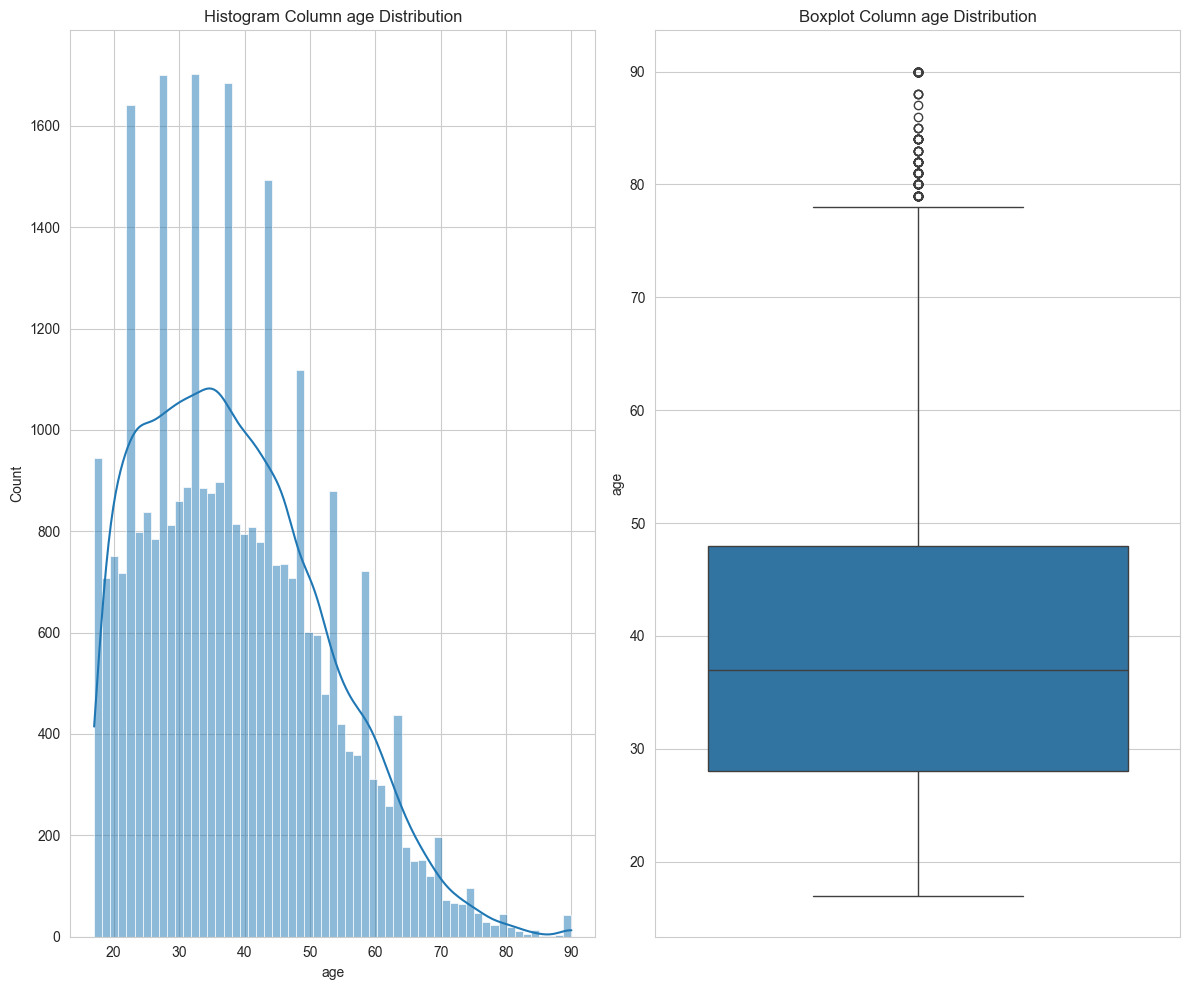

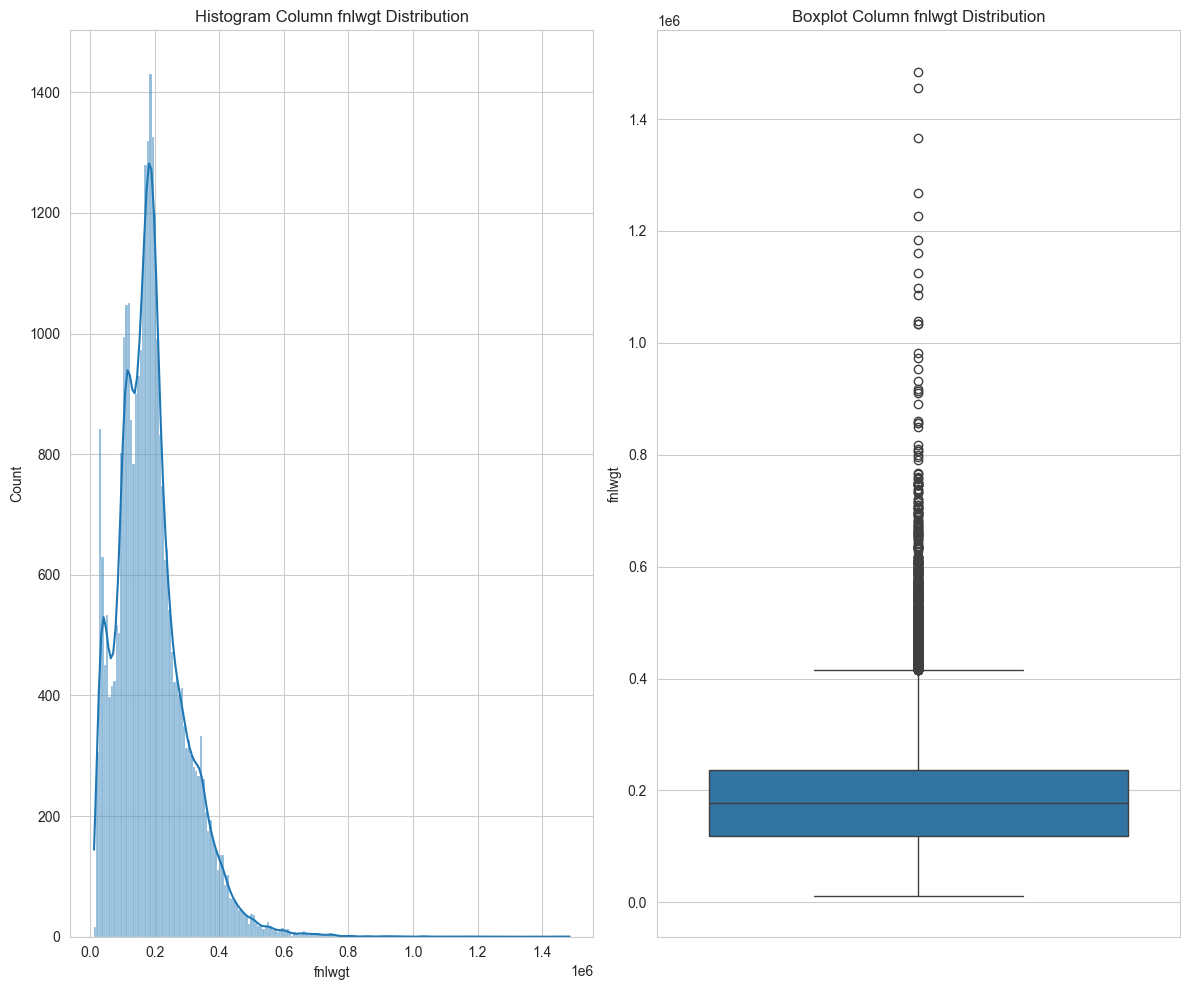

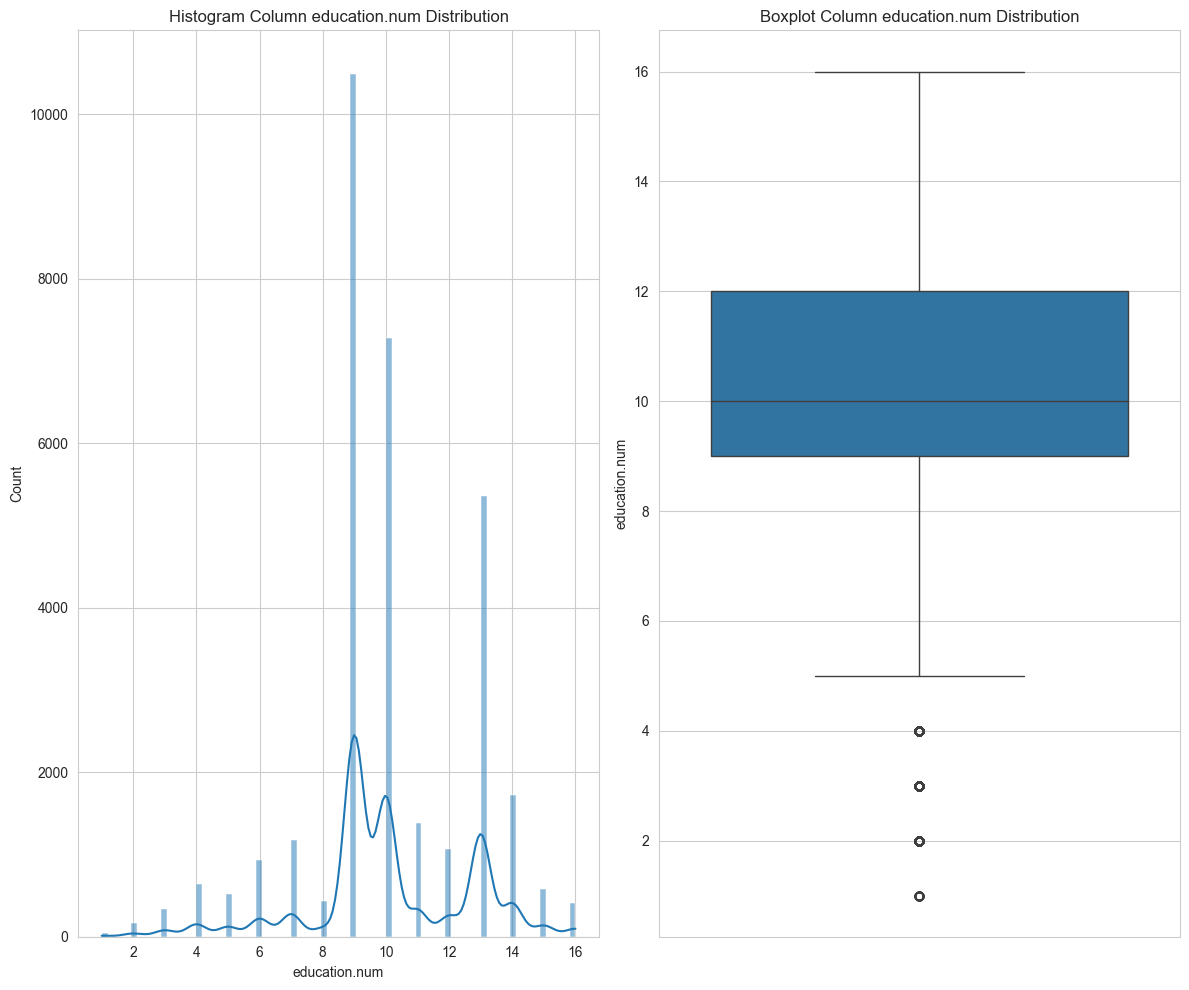

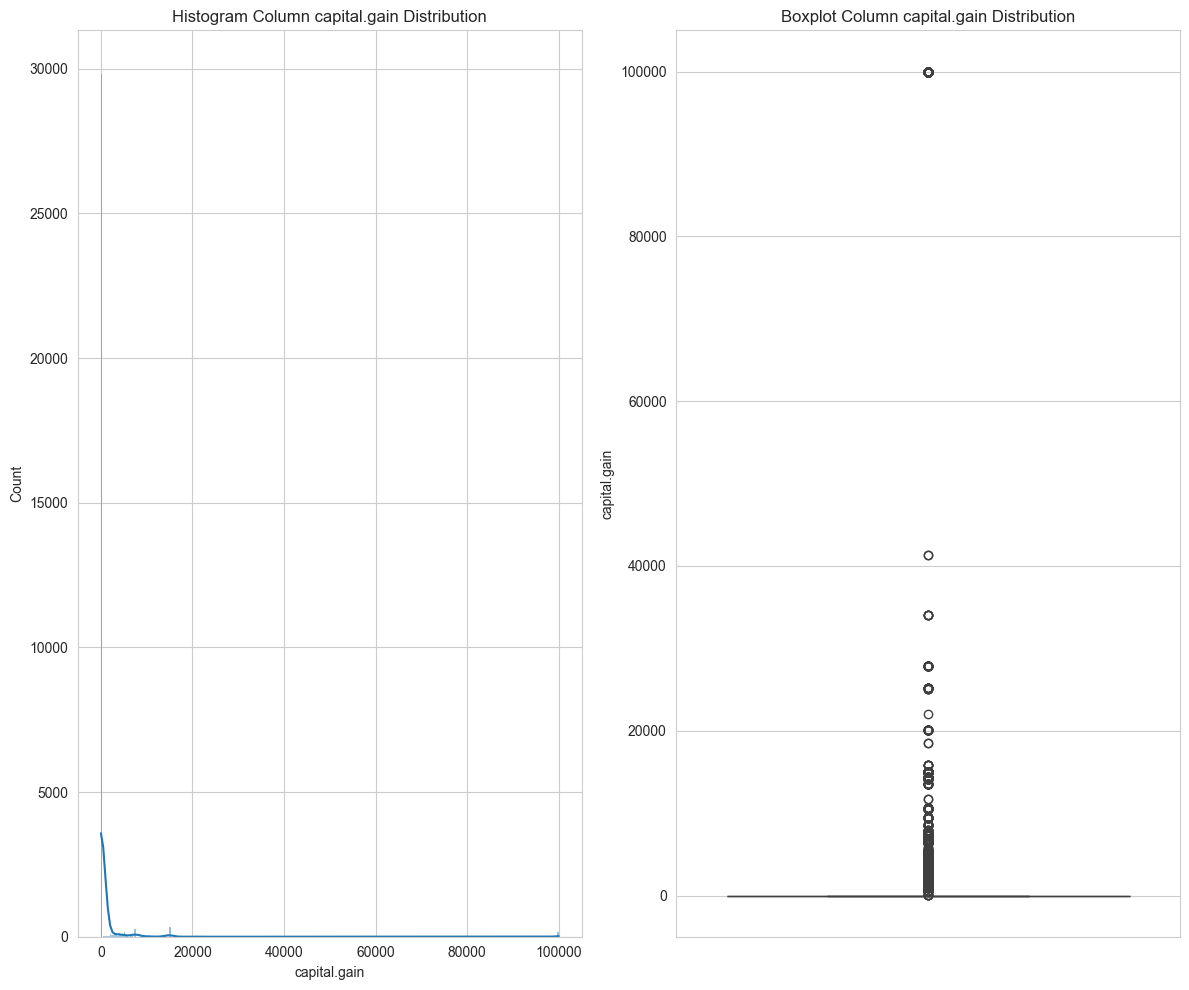

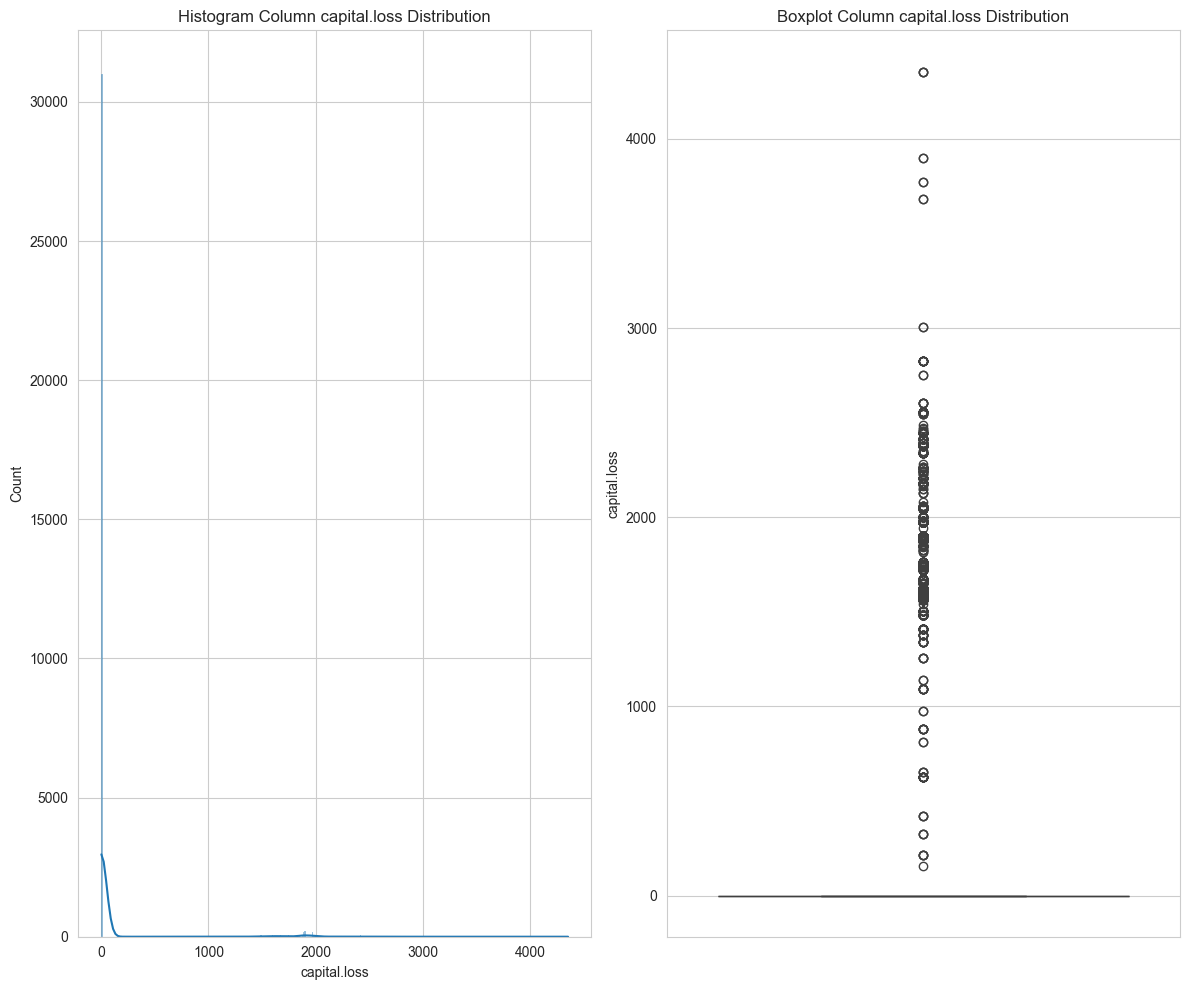

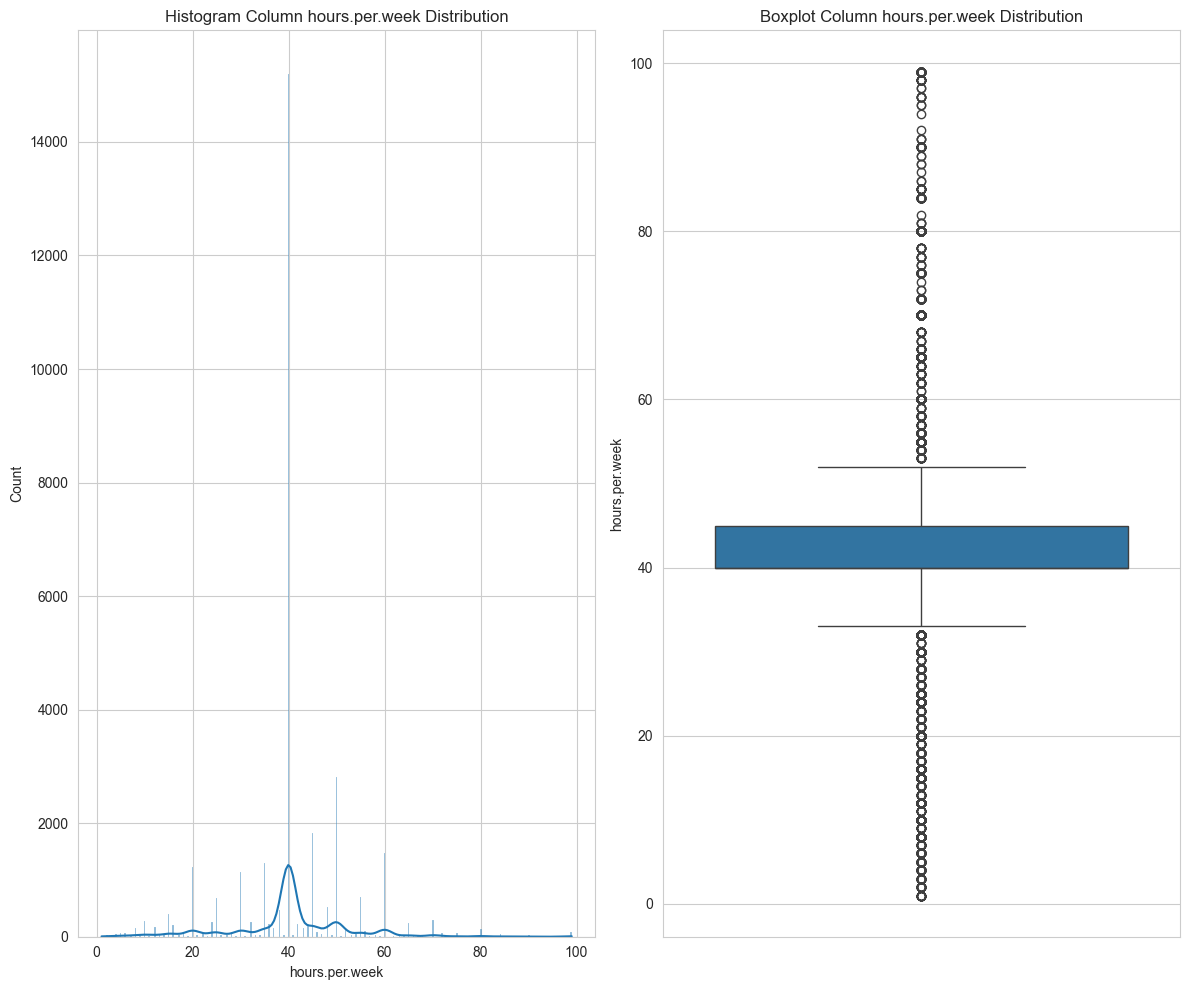

In [170]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram Column {col} Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot Column {col} Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [171]:
df_clean = df.drop(columns=['fnlwgt', 'education', 'native.country', 'capital.gain', 'capital.loss'])

### B.2 Drop Unrelated Rows

In [172]:
df_clean = df_clean.replace('?', pd.NA).dropna()

### B.3 Handling Outliers

In [173]:
df_clean = df_clean[(df_clean['hours.per.week'] >= 10) & (df_clean['hours.per.week'] <= 80)]

### B.4 Mapping Features

#### Object

Binary Object

In [174]:
df_clean['sex'] = df_clean['sex'].map({'Male': 1, 'Female': 0})
df_clean['income'] = df_clean['income'].map({'>50K': 1, '<=50K': 0})

Categorical Object

In [175]:
# Married vs Single
married_types = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
df_clean['marital.status'] = df_clean['marital.status'].apply(lambda x: 1 if x in married_types else 0)

Frequency Encoding

In [176]:
# Nominal Columns (Occupation, Workclass, etc) replaced by the frequency of its occurrence
cols_to_freq_encode = ['workclass', 'occupation', 'relationship', 'race', 'marital.status']

for col in cols_to_freq_encode:
    freq_map = df_clean[col].value_counts().to_dict()
    df_clean[col] = df_clean[col].map(freq_map)

### B.5 Feature Engineering

#### Adding New Column

 Net Capital

In [177]:
df_clean['net_capital'] = df['capital.gain'] - df['capital.loss']

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Target Distribution

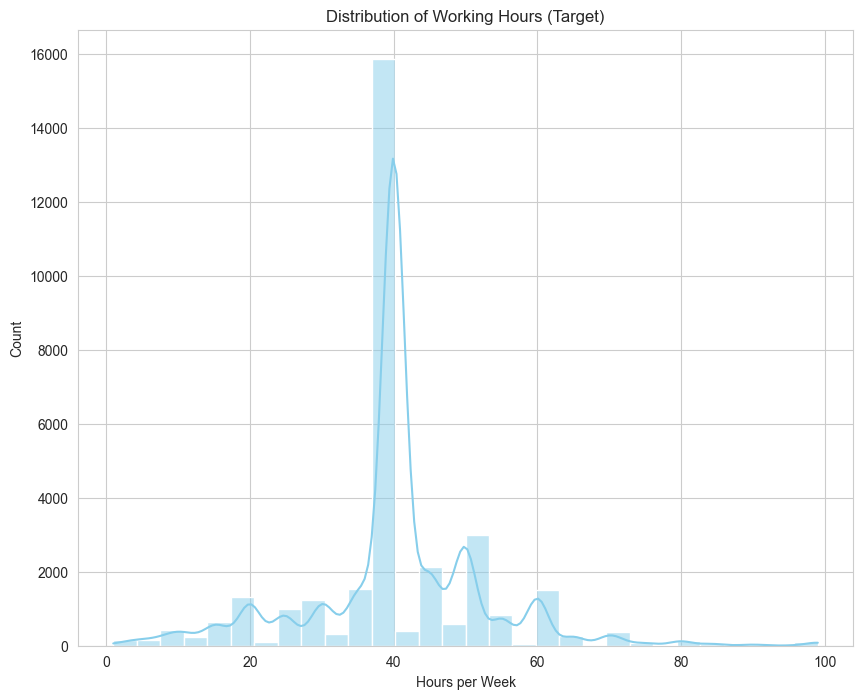

In [178]:
plt.figure(figsize=(10, 8))
sns.histplot(df['hours.per.week'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Working Hours (Target)')
plt.xlabel('Hours per Week')
plt.show()

#### Feature Distribution

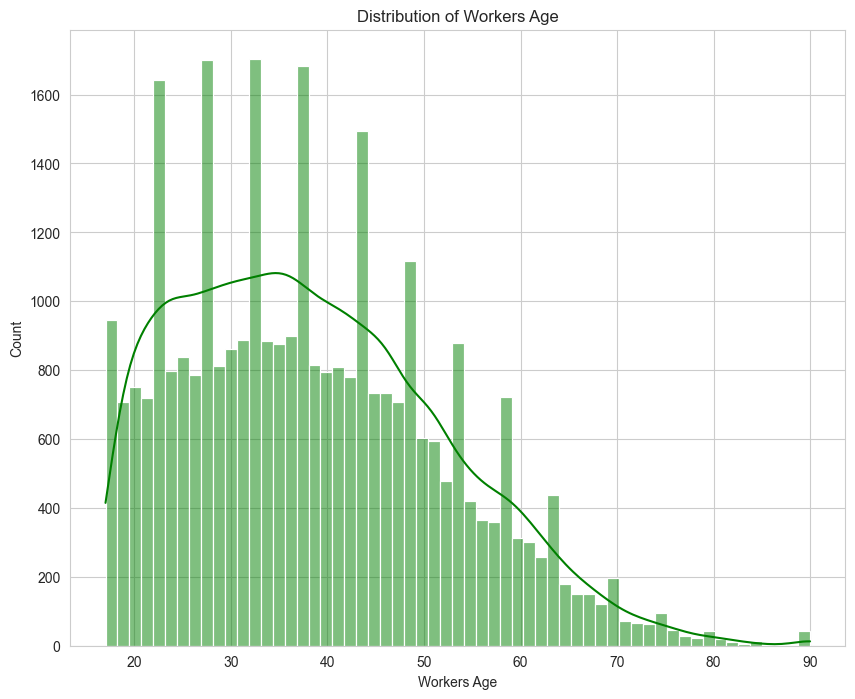

In [179]:
plt.figure(figsize=(10, 8))
sns.histplot(df['age'], kde=True, color='green')
plt.title('Distribution of Workers Age')
plt.xlabel('Workers Age')
plt.show()

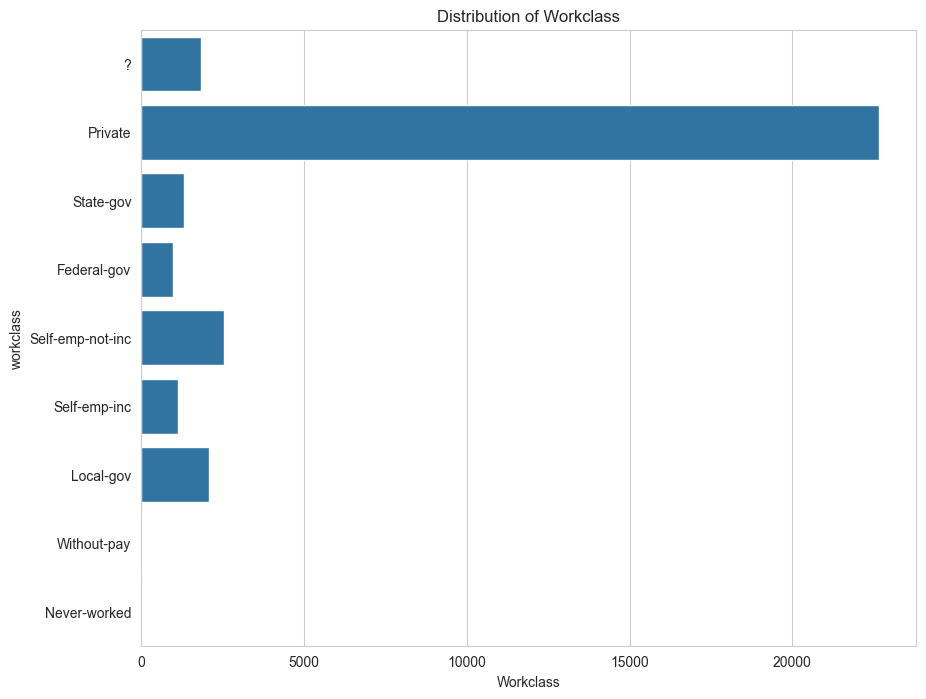

In [180]:
plt.figure(figsize=(10, 8))
sns.countplot(y='workclass', data=df)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.show()

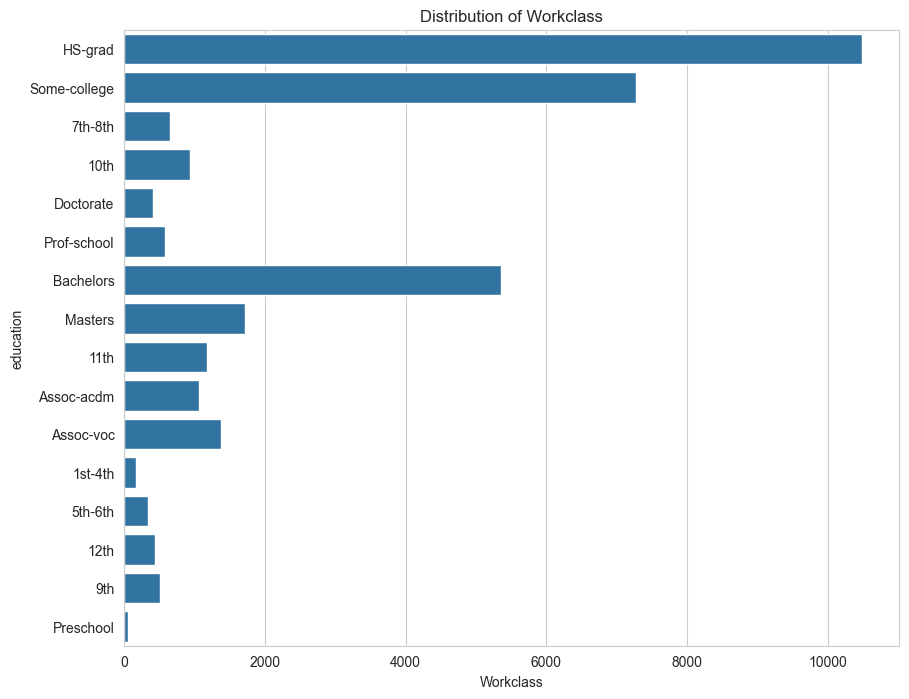

In [181]:
plt.figure(figsize=(10, 8))
sns.countplot(y='education', data=df)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.show()

### C.2 Bivariate Analysis

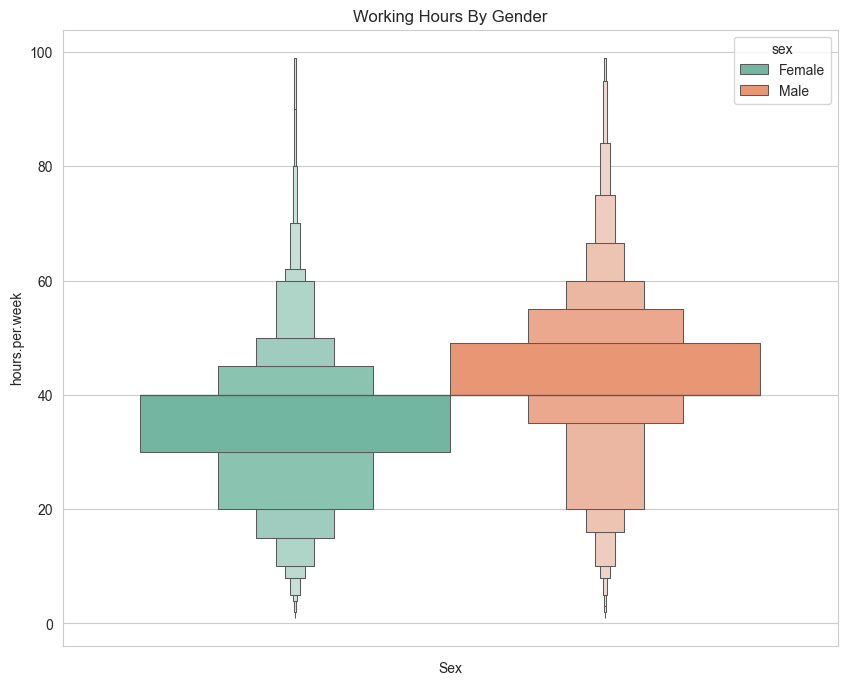

In [182]:
plt.figure(figsize=(10, 8))
sns.boxenplot(hue='sex', y='hours.per.week', data=df, palette='Set2', legend=True)
plt.title('Working Hours By Gender')
plt.xlabel("Sex")
plt.show()

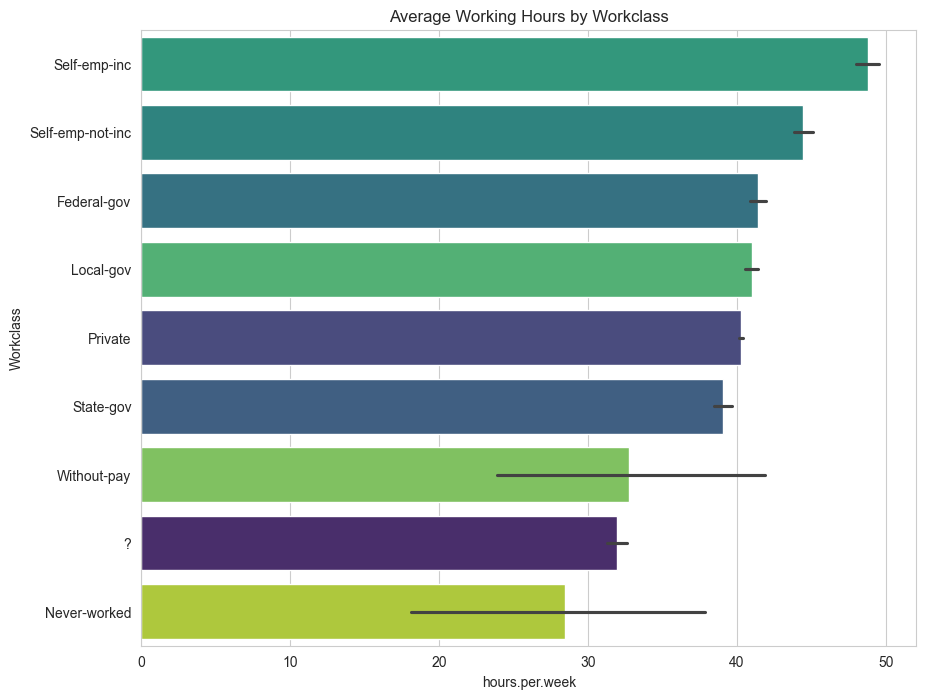

In [183]:
plt.figure(figsize=(10, 8))
order = df.groupby('workclass')['hours.per.week'].mean().sort_values(ascending=False).index
sns.barplot(x='hours.per.week',y='workclass', hue='workclass', data=df, order=order, palette='viridis', legend=False)
plt.title('Average Working Hours by Workclass')
plt.ylabel("Workclass")
plt.show()

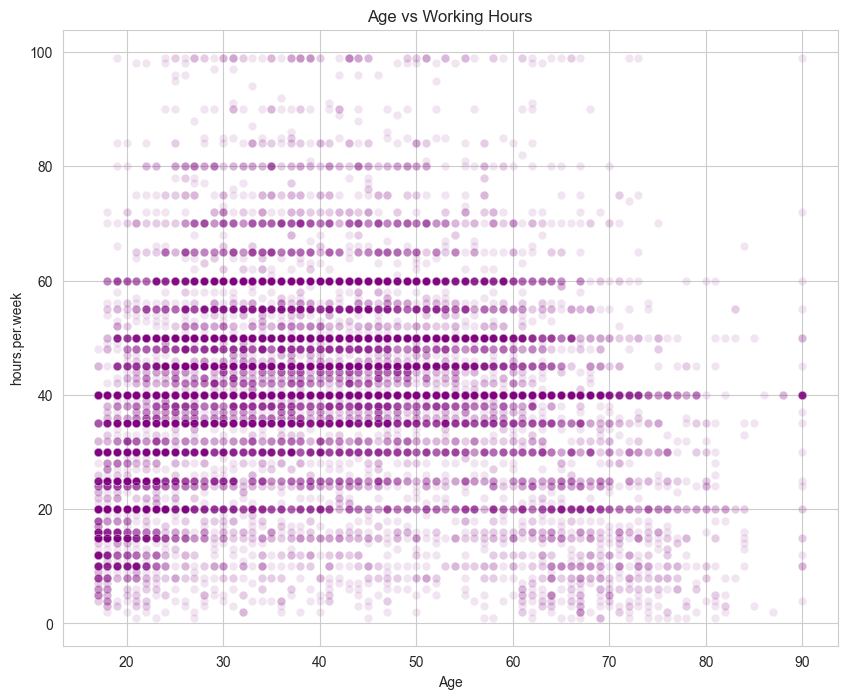

In [184]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='hours.per.week', data=df, alpha=0.1, color='purple')
plt.title('Age vs Working Hours')
plt.xlabel("Age")
plt.show()

### C.3 Multivariate Analysis

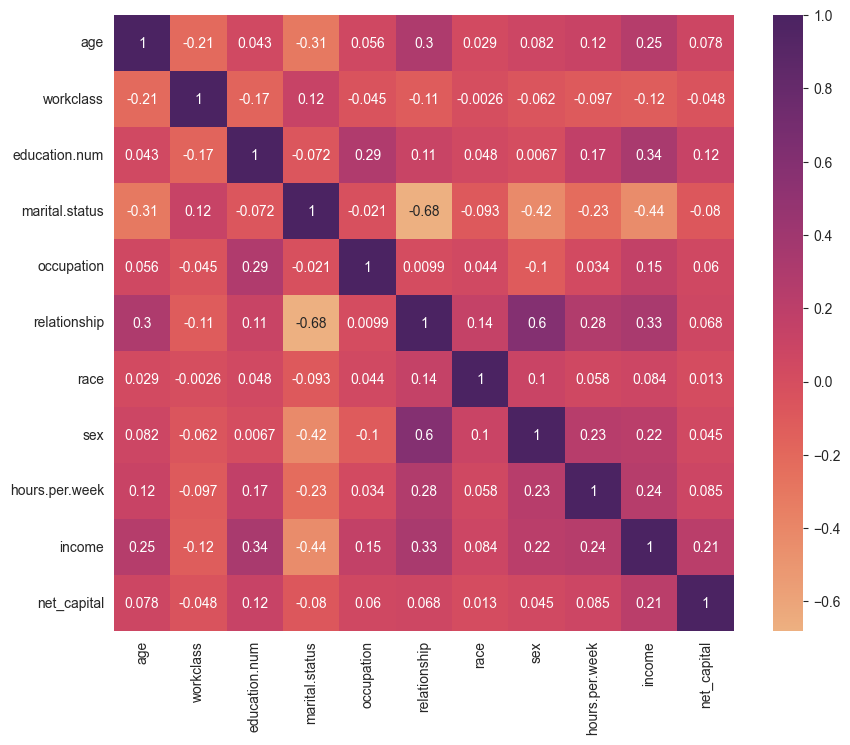

In [196]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [185]:
X_data = df_clean.drop(columns=['hours.per.week'])
y_data = df_clean['hours.per.week']

### D.2 Matrix Modification (Add Bias)

In [186]:
# Adding '1' Bias to every X Data
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### D.3 Splitting Train Data and Test Data (80:20)

In [187]:
y_data = y_data.values

# 1. Shuffle Data
np.random.seed(42)
indices = np.random.permutation(len(X_matrix))

# 2. Train & Test Length
test_size = int(len(X_matrix) * 0.2)

# 3. Splitting Index
test_idx = indices[:test_size]
train_idx = indices[test_size:]

# 4. Making X & y Variables
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.4 Matrix Theta Formula (The Normal Equation)

In [191]:
y_train_matrix = y_train.reshape(-1, 1)

# 1. Calculate Theta
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train_matrix

# 2. Model Predictions
test_predictions = X_test @ theta
train_predictions = X_train @ theta

In [192]:
theta.shape

(11, 1)

### D.5 Modelling Results

In [193]:
features = df_clean.drop(columns=['hours.per.week']).columns.tolist()
intercept = theta[0][0]

print("--- MODEL RESULTS ---")
print(f"Intercept (Base Working Hours): {intercept:.2f} hours/week")

# Loop for every Coefisien
for i, feature_name in enumerate(features):
    slope = theta[i+1][0]
    
    print(f"Coefisien {feature_name}: {slope:.4f}")

print("\n--- PREDICTION FORMULAS ---")
print(f"Hours = {intercept:.2f}", end=" ")
for i, feature_name in enumerate(features):
    slope = theta[i+1][0]
    sign = "+" if slope >= 0 else ""
    
    print(f"{sign} ({slope:.2f} * {feature_name})", end=" ")
print("")

--- MODEL RESULTS ---
Intercept (Base Working Hours): 34.46 hours/week
Coefisien age: 0.0120
Coefisien workclass: -0.0000
Coefisien education.num: 0.4131
Coefisien marital.status: -0.0002
Coefisien occupation: -0.0001
Coefisien relationship: 0.0004
Coefisien race: 0.0000
Coefisien sex: 2.7085
Coefisien income: 2.9261
Coefisien net_capital: 0.0000

--- PREDICTION FORMULAS ---
Hours = 34.46 + (0.01 * age)  (-0.00 * workclass) + (0.41 * education.num)  (-0.00 * marital.status)  (-0.00 * occupation) + (0.00 * relationship) + (0.00 * race) + (2.71 * sex) + (2.93 * income) + (0.00 * net_capital) 


## E. Evaluation

### E.1 Calculate MSE (Mean Squared Error)

#### Error Test & Train

In [200]:
test_error = y_test - test_predictions
train_error = y_train - train_predictions

#### Test MSE

In [201]:
test_mse = np.mean(test_error ** 2)
print(f"{test_mse:.2f}")

129.48


#### Train MSE

In [ ]:
train_mse = np.mean(train_error ** 2)
print(f"{train_mse:.2f}")

### E.2 Calculate MAE (Mean Absolute Error)

In [ ]:
mse = np.mean(test_error ** 2)
print(f"{mse:.2f}")

### E.3 Hitung RMSE (Root Mean Squared Error)

### E.4 Regression Visualization

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Actual Hours')
plt.ylabel('Prediction Hours')
plt.title('Model Evaluation: Actual vs Prediction')
plt.grid(True)
plt.show()